In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Test_Sales_LinReg.csv')

data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [4]:
data.shape

(305, 6)

In [5]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [7]:
data['Republic'] = data['Republic'].fillna(data['Republic'].mode()[0])

data['NDTV'] = data['NDTV'].fillna(data['NDTV'].mean())

data['TV9'] = data['TV9'].fillna(data['TV9'].mean())

data['AajTak'] = data['AajTak'].fillna(data['AajTak'].mean())

In [8]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,149.341967,22.341333,29.459344,28.862626,23.517967,13.811475
std,86.131786,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,163.500000,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


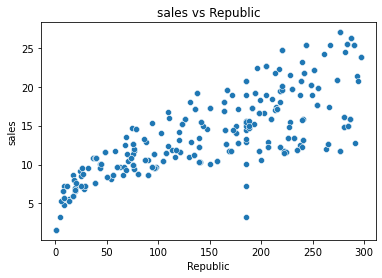

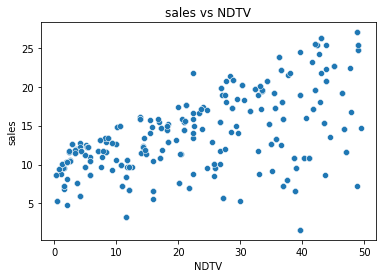

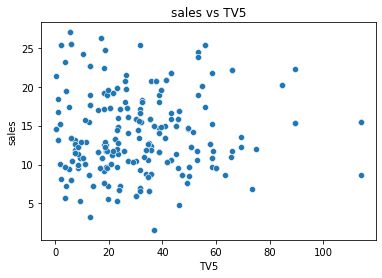

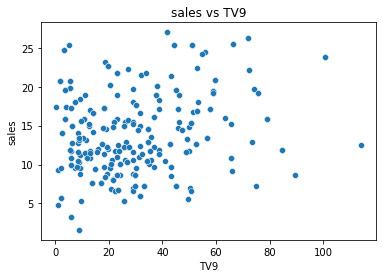

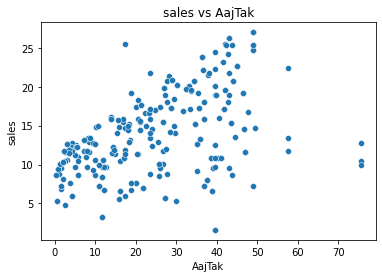

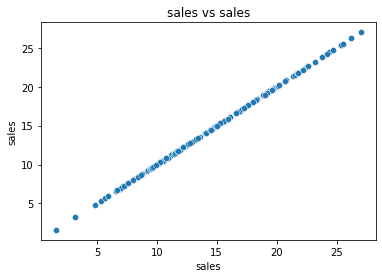

Correlation coefficients with Sales:
Republic    0.767354
NDTV        0.572392
TV5         0.047489
TV9         0.256039
AajTak      0.480500
sales       1.000000
Name: sales, dtype: float64


In [9]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_features:
    sns.scatterplot(x=data[feature], y=data['sales'])
    plt.title(f'sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('sales')
    plt.show()

categorical_features = data.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    sns.boxplot(x=data[feature], y=data['sales'])
    plt.title(f'sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('sales')
    plt.show()

correlation_matrix = data.corr()
print("Correlation coefficients with Sales:")
print(correlation_matrix['sales'])

In [10]:
X = data.drop(columns=['sales'])
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.550004783479842
R-squared: 0.8761044482178576
